<a href="https://colab.research.google.com/github/TamiBorges/Controlando-Rotatividade-das-empresas/blob/main/An%C3%A1lise_coment%C3%A1rios_dos_clientes_em_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise comentários dos clientes- em texto**

*Trabalharemos com processamento de linguagem natural, após avaliações dos clientes por texto, podemos analisar os reviews e fazer a classificação, se são comentários positivos ou negativos, usando um classificador de sentimentos para indicar o nível de satisfação dos clientes.*

## **Importação das bibliotecas e base de dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews= pd.read_csv('/content/amazon_alexa.tsv', sep= '\t')

In [3]:
reviews.shape


(3150, 5)

In [4]:
reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## **Exploração dos dados**

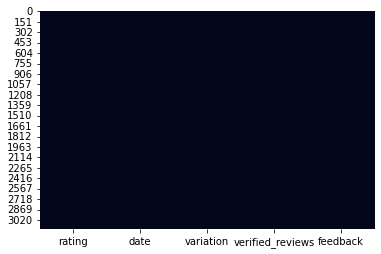

In [7]:
sns.heatmap(reviews.isnull(), cbar=False);

In [8]:
reviews.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

*Podemos fazer histogramas para visualisação dos valores numéricos.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4f2a60750>,
      dtype=object)

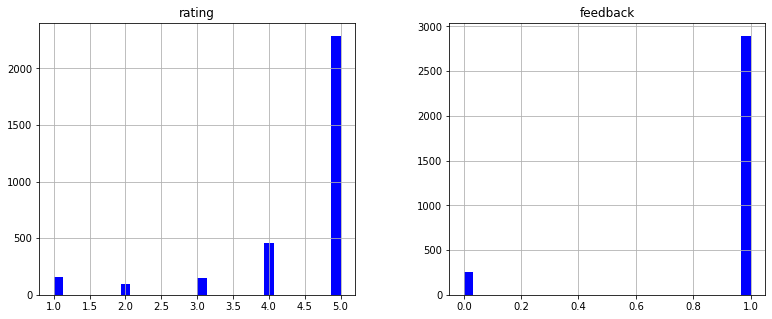

In [9]:
reviews.hist(bins=30, figsize=(13, 5), color='b')

*Observamos no primeiro gráfico, que as notas dos Rating de 1 (ruim) até 5 (ótimo), a maior quantidade está no valor 5. Já para o segundo gráfico,para feddbacks negativos (0) obteve-se um valor bem baixo, comparado ao feedback positivo (1) que foi bem alto.*

In [10]:
reviews['length']= reviews['verified_reviews'].apply(len)
reviews.head()


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


*Para visualizarmos a distribuição de frequencia dos tamanhos dos reviews, podemos criar histogramas.*



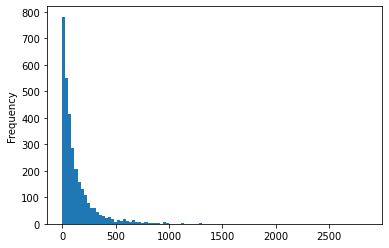

In [11]:
reviews['length'].plot(bins=100, kind='hist')

In [12]:
reviews.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

*É possivel ver que a média de caracteres é de 132, o mínimo é de 1, e o máximo é de 2851 para os reviews escritos pelos clientes. Podemos também filtrar estes comentários para poder vê-los.*

In [13]:
reviews[reviews['length']== 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [14]:
reviews[reviews['length']== 1]['verified_reviews'].iloc[0]

'😍'

In [15]:
positivo= reviews[reviews['feedback']==1]
positivo.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [16]:
positivo.shape

(2893, 6)

In [17]:
negativo= reviews[reviews['feedback']==0]
negativo.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [18]:
negativo.shape

(257, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


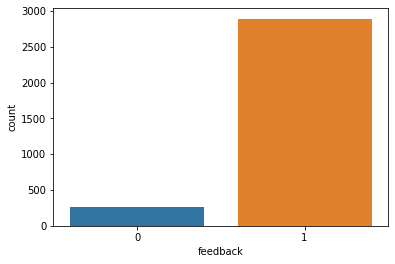

In [19]:
sns.countplot(reviews['feedback']);


*Acima observamos que o valor dos feedbacks posivitos (1) são bem maiores que os negativos (0)*

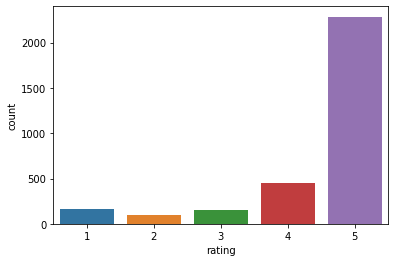

In [20]:
sns.countplot(x='rating', data=reviews);

*Acima é possível visualizar que o valor de 5 estrelas que é a maior nota que os clientes podem dar, é a maior barra.*

*Abaixo podemos fazer um gráfico para buscarmos a relação entre a variação dos produtos (GB, cor), e as notas dadas pelos clientes.*

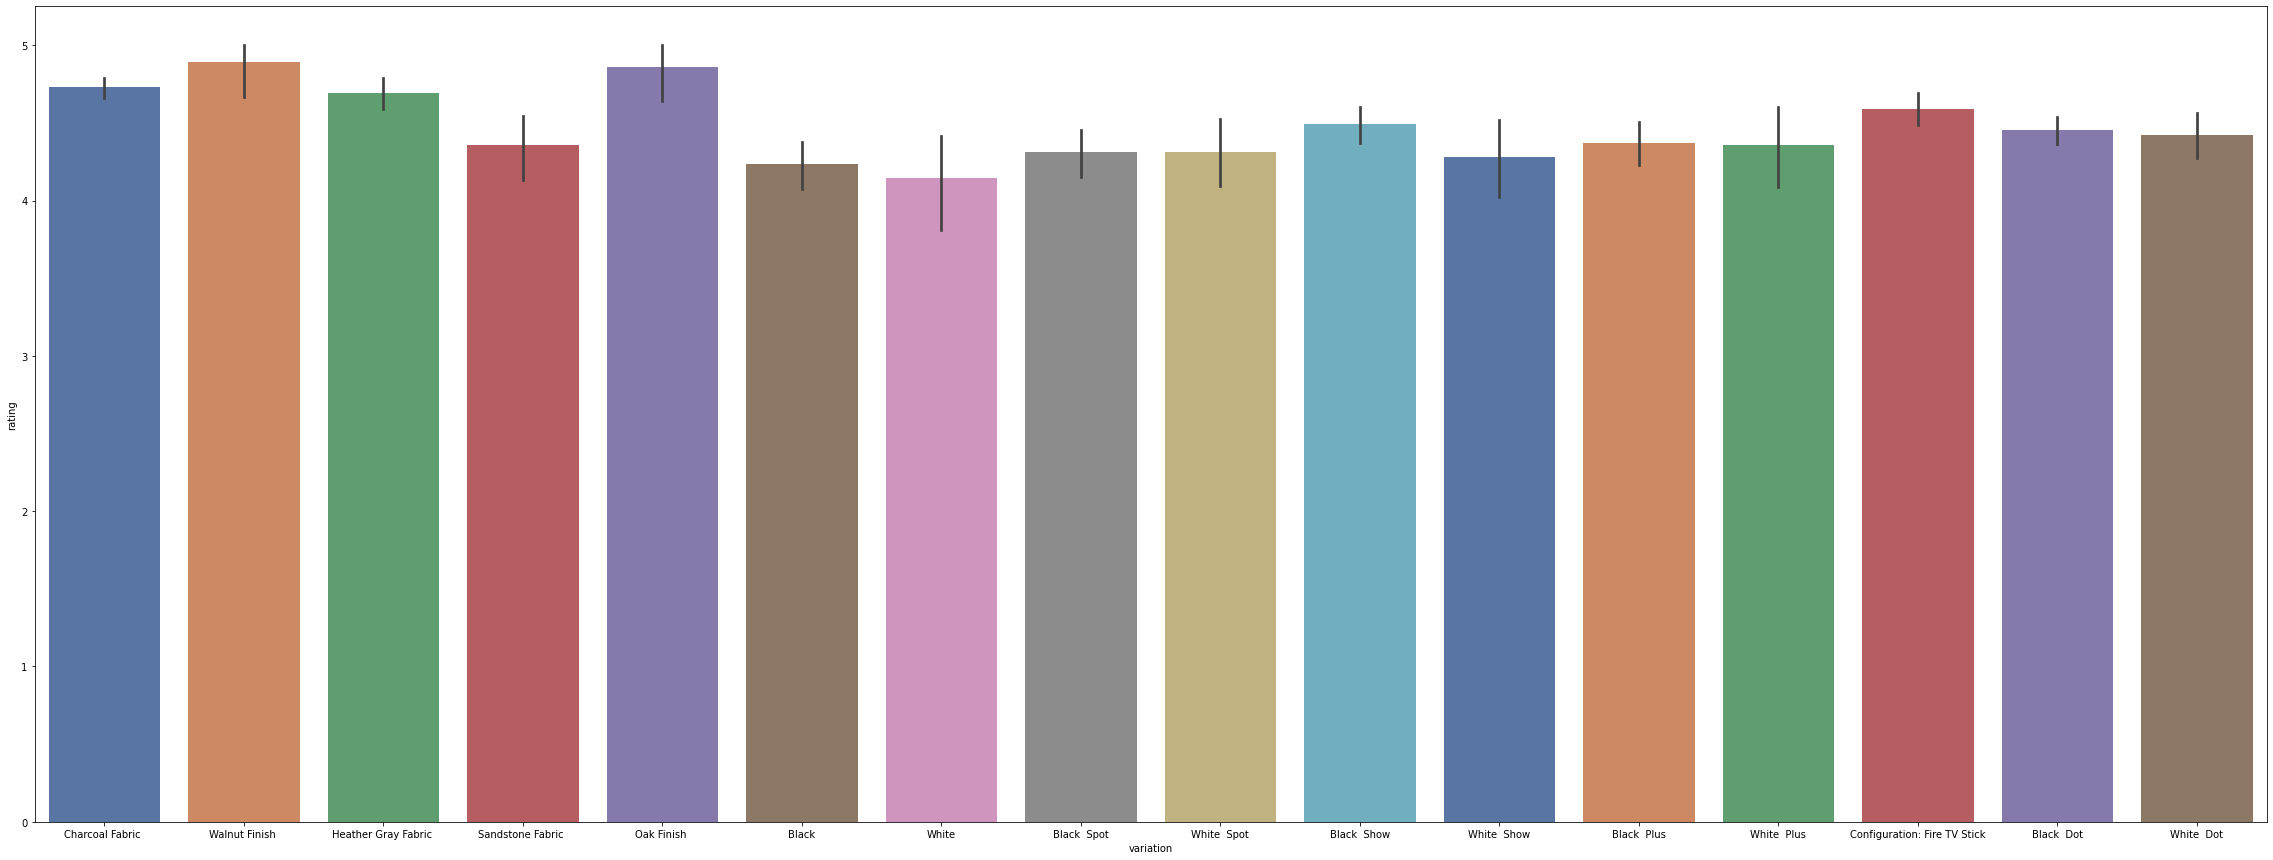

In [21]:
plt.figure(figsize=(40,15))
sns.barplot(x= 'variation', y= 'rating', data= reviews, palette='deep' );

*Neste caso os valores estão bem equiparados, mas é possível ver que a barra rosa, referente aos produtos de cor branca, é menor, ou seja, pode ser que os clientes procurem menos por produtos de cor branca.*

*Agora iremos gerar as nuvens de palavras com as palavras mais recorrentes nos comentários. Primeiramente convertendo os comentários para o formato de lista, e depois colocando todos os textos em apenas uma string.*

In [22]:
sentences= reviews['verified_reviews'].tolist()
len(sentences)

3150

In [23]:
print(sentences[0:10])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [24]:
sentences_uma_string= ' '.join(sentences)

In [25]:
sentences_uma_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

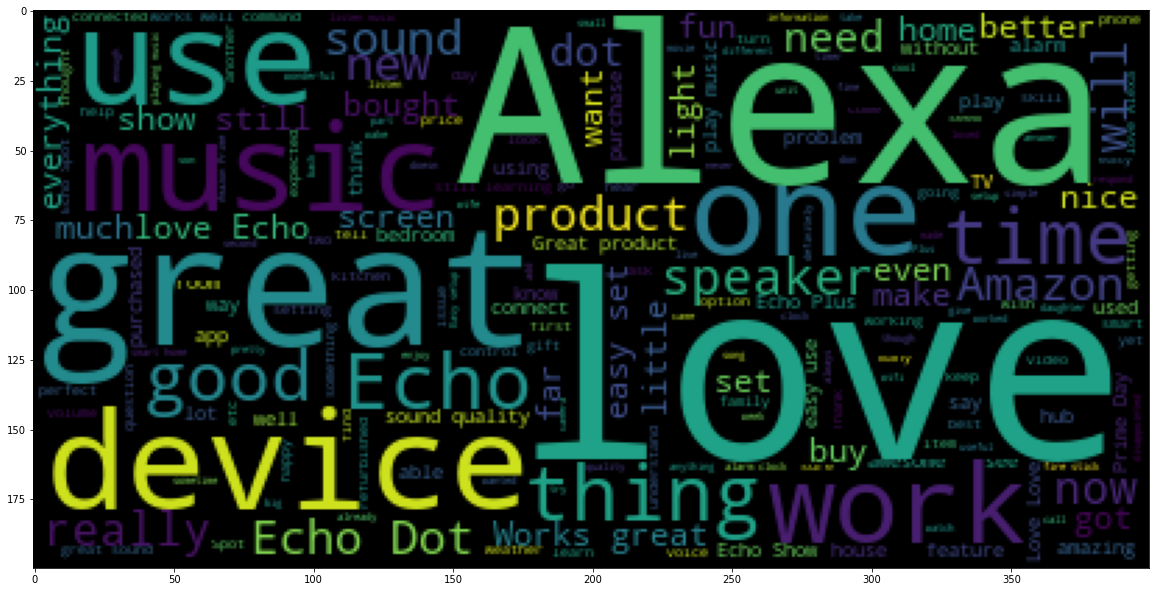

In [26]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_uma_string));

*Podemos montar outra nuvem apenas com as palavras negativas.*

In [27]:
negativo_list= negativo['verified_reviews'].tolist()
negativo_sentences_uma_string =' ' .join(negativo_list)

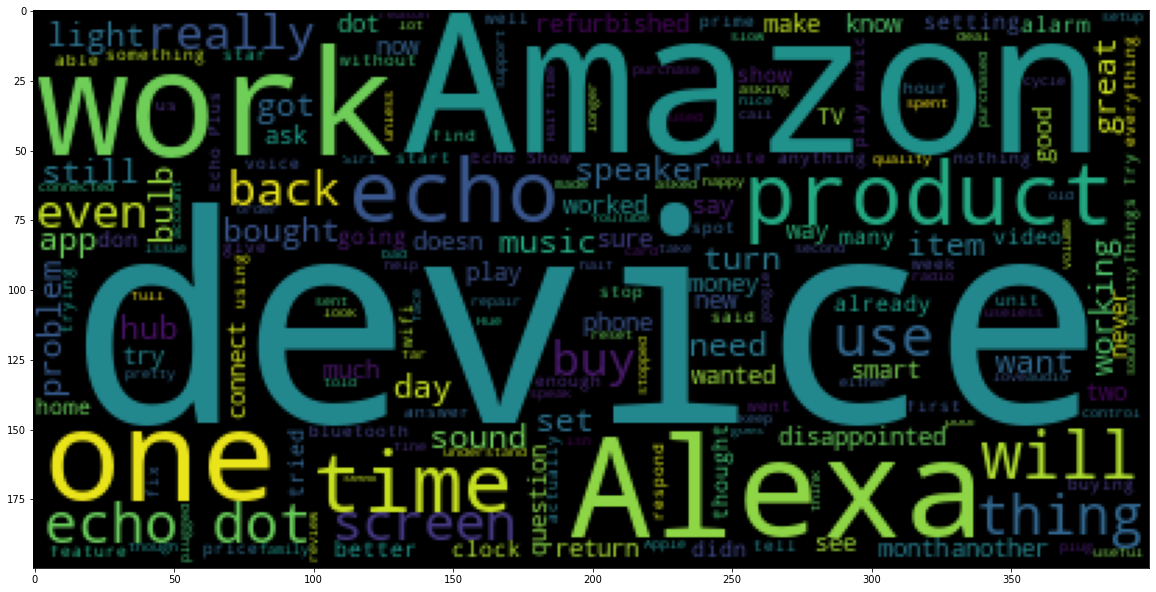

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negativo_sentences_uma_string));

## **Limpeza dos dados**

*Vamos refazer nossa data frame (reviews), retirando alguns atributos que não são úteis no momento.*

In [29]:
reviews= reviews.drop(['rating', 'date', 'length'], axis=1)

In [30]:
reviews.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


*Precisaremos agora, transformar os textos do atributo variation que são categóricos para valor, para isso usaremos o OneHotEncoder do sklearn, transformando-os em dummy variables. Uma variável dummy é aquela que leva apenas o valor 0 ou 1 para indicar a ausência ou presença de algum efeito categórico que pode mudar o resultado. Se houvesse uma ordem de importancia, por exemplo, ótimo, bom, regular, e ruim, poderiamos substituir por numeros (1, 2, 3 e 4), o que não é o caso no momento.*

In [31]:
x_cat= reviews[['variation']]
x_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [32]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder()
x_cat= onehotencoder.fit_transform(x_cat).toarray()

In [33]:
x_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [34]:
type(x_cat)

numpy.ndarray

In [35]:
x_cat= pd.DataFrame(x_cat)
type(x_cat)

pandas.core.frame.DataFrame

In [36]:
reviews.drop(['variation'], axis=1, inplace= True)

In [37]:
reviews.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [38]:
reviews= pd.concat([reviews, x_cat], axis=1)
reviews

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*Criei uma variavel para receber apenas a coluna variation, fiz a transformação para varible dummy, voltei para tipo data frame, pois eu havia transformado para array, apaguei esta coluna do data frame original, pois já foi processada na base de dados principal. Por fim juntamos os 2 data frames reviews e x_cat, ou seja separei o atributo variation em outra data frame apenas para o processamento, depois uni novamente no data frame com os outros dois atributos: verified_reviews e feedback*

## **Remoção de pontuação dos textos**

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
test= ('Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.')

In [41]:
teste_remover_pont= [char for char in test if char not in string.punctuation]

In [42]:
print(teste_remover_pont)

['S', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'p', 'l', 'a', 'y', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'a', 'm', 'e', ' ', 'y', 'o', 'u', ' ', 'c', 'a', 'n', ' ', 'a', 'n', 's', 'w', 'e', 'r', ' ', 'a', ' ', 'q', 'u', 'e', 's', 't', 'i', 'o', 'n', ' ', 'c', 'o', 'r', 'r', 'e', 'c', 't', 'l', 'y', ' ', 'b', 'u', 't', ' ', 'A', 'l', 'e', 'x', 'a', ' ', 's', 'a', 'y', 's', ' ', 'y', 'o', 'u', ' ', 'g', 'o', 't', ' ', 'i', 't', ' ', 'w', 'r', 'o', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'a', 'n', 's', 'w', 'e', 'r', 's', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'e', ' ', 'a', 's', ' ', 'y', 'o', 'u', ' ', ' ', 'I', ' ', 'l', 'i', 'k', 'e', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'a', 'b', 'l', 'e', ' ', 't', 'o', ' ', 't', 'u', 'r', 'n', ' ', 'l', 'i', 'g', 'h', 't', 's', ' ', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'o', 'f', 'f', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'a', 'w', 'a', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'h', 'o', 'm', 'e']


In [43]:
teste_remover_pont=''.join(teste_remover_pont)
teste_remover_pont

'Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home'

*Aqui fizemos o primeiro teste do que faremos depois com todos os comentários, criamos uma variavel que recebeu um comentário qualquer, criamos outra que vai receber este comentário sem as pontuações, e depois convertemos essa lista em uma unica string.*

## **Remoção de stop words**

*Stopwords são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma Search Engine. Neste caso procuramos identificar comentarios negativos, então palavras como: ( para, com,  do, da, etc), não causam efeito algum na nossa previsão.*

In [44]:
import nltk

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
from nltk.corpus import stopwords
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [48]:
teste_remover_pont

'Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home'

In [49]:
teste_remover_stopwords_pont= [word for word in teste_remover_pont.split() if word.lower() not in stopwords.words('english')]

In [50]:
teste_remover_stopwords_pont

['Sometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'Alexa',
 'says',
 'got',
 'wrong',
 'answers',
 'like',
 'able',
 'turn',
 'lights',
 'away',
 'home']

*Aqui fizemos o segundo teste do que faremos depois com todos os comentários, fizemos o dowload do pacote stopwords para apagar as palavras irrelevantes,  pegamos a variavel criada para retirada de pontuação, e criamos outra que vai receber os comentários sem stopwords.*

## **Count vectorization (tokenização)**

*Tokenização é o processo de transformação de letras em números.*

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
sample_data= ['o sapo nao lava o pe.', 'não lava porque não quer.',
              'o sapo não lava o pe.', 'porque não quer.', 'mas que chulé.']

In [53]:
vectorizer= CountVectorizer()
x= vectorizer.fit_transform(sample_data)

In [54]:
print(vectorizer.get_feature_names())

['chulé', 'lava', 'mas', 'nao', 'não', 'pe', 'porque', 'que', 'quer', 'sapo']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
print(x.toarray())

[[0 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 2 0 1 0 1 0]
 [0 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 0 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 0]]


*Aqui fizemos o terceiro teste do que faremos depois com todos os comentários,  importamos a classe do sklearn para transformação de letras para numeros, criamos uma variavel para receber as frases, fazemos o fit transform dessas palavras dentro da variavel, você passa o texto e ele retorna os numeros, e passamos para array para ficar em formato de matriz.*

## **Pipeline de limpeza dos textos**

*Criamos a função com todo processamento de limpeza dos textos - retirada dos pontos, stopwords, e retorno para uma unica string - Criamos outra variavel apenas para receber os textos limpos, e transformamos os textos em números, apagamos a coluna verified_reviews do nosso data frame original, e concatenamos o data frame original + o data frame verified_reviews que foi transformado em numeros.* 

In [56]:
def message_cleaning(message):
  text= [char for char in message if char not in string.punctuation]
  text= ''.join(text)
  text= [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return text

In [57]:
reviews_clean= reviews['verified_reviews'].apply(message_cleaning)

In [58]:
print(reviews_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [59]:
print(reviews['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [60]:
reviews_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(analyzer=message_cleaning)
reviews_count_vectorizer= vectorizer.fit_transform(reviews['verified_reviews'])

In [62]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5211

In [64]:
print(reviews_count_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
reviews.drop(['verified_reviews'], axis=1, inplace=True)

In [66]:
reviews.head()

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
type(reviews_count_vectorizer)

scipy.sparse.csr.csr_matrix

In [68]:
reviews_count_vec= pd.DataFrame(reviews_count_vectorizer.toarray())

In [69]:
type(reviews_count_vec)

pandas.core.frame.DataFrame

In [70]:
reviews= pd.concat([reviews, reviews_count_vec], axis=1)

In [71]:
reviews

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
x= reviews.drop(['feedback'], axis=1)
x

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y= reviews['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

*Criamos duas variaveis x e y, na variavel x deixamos os valores do variation que transformamos em dummy varibles (numeros de 0 a 1), e os valores que substituem as palavras unicas da nossa matriz (comentários), já na variavel y deixamos apenas o feedback, portanto no y estão os valores reais, e no x são os valores que vamos prever.*

## **Treinamento e avaliação do Naive Bayes**

*O algoritmo Naive Bayes é utilizado para classificação de textos, para isso começamos fazendo a divisão na base de dados entre treinamento e teste, importamos o train_test_split e aplicamos ele as variaveis, aqui vamos utilizar 80% da base de dados para treinamento e 20% para teste.*

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [75]:
x_train.shape, x_test.shape


((2520, 5227), (630, 5227))

In [76]:
from sklearn.naive_bayes import MultinomialNB

*Existem alguns tipos de algorítimos naive bayes o mais utilizado é o GaussianNB que é usado quando você tem uma distribuição normal, ou seja, informações das pessoas como salario, idade, etc, neste nosso caso trabalhamos com valores de 0 e 1, ou seja uma distribuição multinomial então utilizamos o algoritmo MultinomialNB*

**Fazendo o treinamento:**

In [77]:
naive_bayes= MultinomialNB()
naive_bayes.fit(x_train, y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Fazendo as previsões:**

In [79]:
y_pred= naive_bayes.predict(x_test)

In [80]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [81]:
y_test

788     1
1106    1
2440    1
1969    1
2198    1
       ..
421     1
513     1
1451    1
1889    1
1836    1
Name: feedback, Length: 630, dtype: int64

**Análise dos resultados:**

*A Accuracy é o indicador mais simples de se calcular. Ele é a divisão entre todos os acertos pelo total. Ou seja quando pegamos os valores da matriz de confusão: true positive= 14 + 54= 588, e valor total 14+588+7+35=630, e 588/630, o resultado é exatamento 0.93, ou seja, percentual de acerto de 93%.*

In [82]:
accuracy_score(y_pred, y_test)

0.9253968253968254

In [83]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[ 22,  34],
       [ 13, 561]])

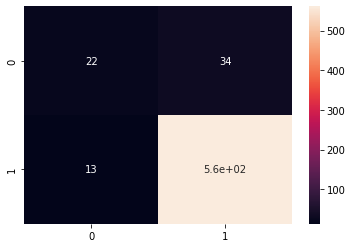

In [84]:
sns.heatmap(cm, annot=True);

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        56
           1       0.94      0.98      0.96       574

    accuracy                           0.93       630
   macro avg       0.79      0.69      0.72       630
weighted avg       0.91      0.93      0.92       630



*Imprimimos acima o classification_report porque nossos dados são desbalanceados,ou seja, temos muito mais valores positivos do que negativos. Vemos que em F1_score temos valor que não é tão bom, em recall, vemos que o modelo identifica corretamente uma porcentagem baixa dos comentários negativos. Nós precisamos melhorar estes valores, pois os reviews negativos são os que mais tem importância neste caso, para verificar um padrão nas reclamações, e buscar soluções.*

**O melhor seria fazermos testes com outros algorítimos para ver se conseguimos valores melhores dos reviews negativos.**

## **Treinamento e avaliação da Regresssão Logística**

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logistic= LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [88]:
y_pred= logistic.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred)

0.9317460317460318

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.46        56
           1       0.94      0.99      0.96       574

    accuracy                           0.93       630
   macro avg       0.86      0.66      0.71       630
weighted avg       0.92      0.93      0.92       630



*Ao compararmos o recall negativo de ambos os algoritmos, podemos observar que utilizando o naive bayes obtivemos melhores resultados do que utilizando a regressão logistica.*

## **Classificação de apenas uma frase**

*O objetivo agora é simular o modelo como se estivessemos em produção, escolhemos um texto negativo, por exemplo, criamos uma variavel para receber apenas o atributo variation, processamos ele para numero, apagamos ele do data frame original e concatenamos ele após processado ao data frame, fazemos o mesmo com o atributo verified_reviews, processamos ele para numero, e depois juntamos ele ao data frame onde o variation já esta processado.*

In [91]:
import pickle

In [92]:
with open('text_classifier.pkl', 'wb') as f:
  pickle.dump([naive_bayes, onehotencoder, vectorizer], f)

In [93]:
with open('text_classifier.pkl', 'rb') as f:
  bayes, onehot, vec= pickle.load(f)

In [94]:
negativo.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [95]:
texto_negativo= negativo.iloc[0:1, [2, 3]]
texto_negativo

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [96]:
x_cat= texto_negativo[['variation']]
x_cat

,variation
46,Charcoal Fabric


In [97]:
x_cat= onehot.transform(x_cat).toarray()
x_cat= pd.DataFrame(x_cat)
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
x_cat.index= texto_negativo.index

In [99]:
x_cat.index, texto_negativo.index

(Int64Index([46], dtype='int64'), Int64Index([46], dtype='int64'))

In [100]:
negativo_df= pd.concat([texto_negativo, x_cat], axis=1)
negativo_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
negativo_df.drop(['variation'], axis=1, inplace=True)
negativo_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
negativo_vec= vec.transform(negativo_df['verified_reviews'])
negativo_vec

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [103]:
review= pd.DataFrame(negativo_vec.toarray())
review


,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
negativo_df.drop(['verified_reviews'], axis=1, inplace=True)
negativo_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
negativo_df.index= review.index

In [106]:
negativo_df.index, review.index

(RangeIndex(start=0, stop=1, step=1), RangeIndex(start=0, stop=1, step=1))

In [107]:
negativo_final=pd.concat([negativo_df, review], axis=1)
negativo_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
bayes.predict(negativo_final)

array([0])

In [109]:
bayes.predict_proba(negativo_final)

array([[0.64828779, 0.35171221]])

*Portanto, só vamos fazer a previsão com a variavel final, após os atributos: variation e verified_reviews não estarem mais como categóricos e sim numericos, processados, individualmente e depois juntamos os dois, e aplicamos o modelo treinado. Esta previsão irá nos trazer se este review deste cliente em questão é um comentário positivo ou negativo, neste caso o modelo acertou quando respondeu [0], porque realmente nós escolhemos um comentário da base de dados (negativo).*